# Step 0: Import libraries and Reading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('display.max_columns', 200)
pd.set_option('display.max_columns', None)  # Show all columns
from pandas.api.types import CategoricalDtype

In [4]:
df = pd.read_csv(r'/Users/omkargopalakrishnan/Downloads/DA-Course/Data Immersion/Exercises-OG/6/6.1/02 Data/Original Data/boat_data.csv', index_col = False)

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [6]:
# Check the dimensionality of the DataFrame
df.shape

(9888, 10)

In [7]:
# Return the first 5 rows
df.head(5)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [8]:
# Return the last 5 rows
df.tail(5)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
9883,CHF 4900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116
9884,EUR 4516,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94
9885,EUR 4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354
9886,EUR 4300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266
9887,CHF 3780,Fishing Boat,DarekCo power boats,new boat from stock,2019,3.60,1.60,GRP,Switzerland Â» Brienzersee Â» Brienz,194


In [9]:
# Fetch the column labels
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [10]:
# Return the dtypes in the DataFrame
df.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
dtype: object

In [11]:
# Generate descriptive statistics
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


# Step 2: Data Cleaning and Preparation
- Dropping irrelevant columns and 
- Identifying duplicated columns
- Renaming Columns
- Feature Creation
- Converting data types
- Downcasting data types to save space
- Create new columns from existing
- Replace missing values in numerical columns with median values
- Replace missing values in categorical and string columns with 'Unknown'
- Fix character encoding issues

In [13]:
# Create a copy of the DataFrame
df = df.copy()

In [14]:
# Fetch the column labels
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [15]:
# Rename column names
df = df.rename(columns={'Boat Type':'Boat_Type', 'Year Built':'Year_Built', 'Number of views last 7 days':'Views_last_7_days'})

In [16]:
# Remove leading/trailing spaces
df.columns = df.columns.str.strip()

In [17]:
# Convert object columns to category
for col in ['Price', 'Boat_Type', 'Manufacturer', 'Type', 'Material', 'Location']:
    df[col] = df[col].astype('category')

In [18]:
# Downcast numeric columns to save space
df['Year_Built'] = pd.to_numeric(df['Year_Built'], downcast='integer')
df['Views_last_7_days'] = pd.to_numeric(df['Views_last_7_days'], downcast='integer')
df['Length'] = pd.to_numeric(df['Length'], downcast='float')
df['Width'] = pd.to_numeric(df['Width'], downcast='float')

In [19]:
# Check dtypes of the downcast numeric columns
df.dtypes

Price                category
Boat_Type            category
Manufacturer         category
Type                 category
Year_Built              int16
Length                float32
Width                 float32
Material             category
Location             category
Views_last_7_days       int16
dtype: object

In [20]:
# Check for missing values in the DataFrame
df.isna().sum()

Price                   0
Boat_Type               0
Manufacturer         1338
Type                    6
Year_Built              0
Length                  9
Width                  56
Material             1749
Location               36
Views_last_7_days       0
dtype: int64

In [21]:
# Check for duplicate rows
df.loc[df.duplicated()]

,Price,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Location,Views_last_7_days


In [22]:
# Check for duplicates in the column Manufacturer
df.loc[df.duplicated(subset=['Manufacturer'])].head(5)

,Price,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Location,Views_last_7_days
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239
11,CHF 3480,Fishing Boat,Marine power boats,new boat from stock,0,4.13,1.41,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa am ZÃ¼...,145
16,CHF 4380,Sport Boat,Linder power boats,new boat from stock,0,4.31,1.64,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,462


In [23]:
# Checking an example duplicate
df.query('Manufacturer == "Abacus power boats"')

,Price,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Location,Views_last_7_days
3017,DKK 4600000,Motor Yacht,Abacus power boats,Used boat,2010,18.660000,5.00,GRP,Italy,55
3817,EUR 750000,Flybridge,Abacus power boats,"Used boat,Diesel",2011,21.469999,5.43,NaN,Italy Â» Mare Adriatico,144
4179,EUR 450000,Flybridge,Abacus power boats,"Used boat,Diesel",2007,18.660000,5.00,NaN,Italy Â» Toscana Â» Toscana,46
5203,EUR 210000,Flybridge,Abacus power boats,"Used boat,Diesel",2011,16.180000,4.75,GRP,Italy Â» Lazio Â» Terracina,101


In [24]:
# Convert the data type of column 'Price' from category to string
df['Price'] = df['Price'].astype(str)

In [25]:
# Use str.extract to split the column 'Price' into the new columns 'Currency' and 'Amount'
df[['Currency', 'Amount']] = df['Price'].str.extract(r'(\D+)\s+(\d+.*)')

In [26]:
# Convert the data type of the column `Currency` to a string type
df['Currency'] = df['Currency'].astype('string')

In [27]:
# Convert Amount to numeric type (removing commas if necessary)
df['Amount'] = df['Amount'].str.replace(',', '').astype(int)

In [28]:
# Delete the column ‘Price'
df.drop('Price', axis=1, inplace=True)

In [29]:
# Replace all occurrences of Â£ with GBP in the column 'Currency'
df['Currency'] = df['Currency'].replace('Â£', 'GBP')

In [30]:
# Dictionary of exchange rates relative to EUR
exchange_rates = {
    "EUR": 1,      # 1 EUR = 1 EUR
    "DKK": 0.13,   # 1 DKK = 0.13 EUR
    "GBP": 1.20,   # 1 GBP = 1.20 EUR
    "CHF": 0.99    # 1 CHF = 0.99 EUR
}

In [31]:
# Remove leading/trailing spaces from column 'Currency'
df['Currency'] = df['Currency'].str.strip()  

In [32]:
# Add a new column 'Price_in_EUR' with the prices converted to EUR using .get() for safe lookup from 
# the dictionary `exchange_rates'
df["Price_in_EUR"] = df.apply(
    lambda row: row["Amount"] * exchange_rates.get(row["Currency"], float("nan")),
    axis=1
)

In [33]:
# Get unique values in the column 'Currency'
unique_currencies = df['Currency'].unique()

# Display the unique currencies
print("Unique currencies:", unique_currencies)

Unique currencies: <StringArray>
['CHF', 'EUR', 'DKK', 'GBP']
Length: 4, dtype: string


In [34]:
# Split the strings in the column 'Location' to separete columns at the delimiter ' Â» '.
print(df['Location'].str.split(' Â» ', expand=True))

                0                    1          2
0     Switzerland          Lake Geneva   VÃ©senaz
1         Germany        BÃ¶nningstedt       None
2     Switzerland       Lake of Zurich  StÃ¤fa ZH
3         Denmark            Svendborg       None
4         Germany               Bayern   MÃ¼nchen
...           ...                  ...        ...
9883  Switzerland        Lago Maggiore   Riazzino
9884      Germany              Hamburg    HAMBURG
9885      Germany  Nordrhein-Westfalen      Wesel
9886        Italy         Dormelletto        None
9887  Switzerland          Brienzersee     Brienz

[9888 rows x 3 columns]


In [35]:
# Splitting the string to the columns 'Country', 'Place_1', and 'Place_2'.
df[['Country', 'Place_1', 'Place_2']] = df['Location'].str.split(' Â» ', expand=True)

In [36]:
# Delete the column 'Location'
df.drop('Location', axis=1, inplace=True)

In [37]:
# Fix character encoding issues in the relevant columns
for col in ['Country', 'Place_1', 'Place_2']:
    df[col] = df[col].apply(lambda x: x.encode('latin-1').decode('utf-8') if isinstance(x, str) else x)

In [38]:
# Display the updated DataFrame
df.head(5)

,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Views_last_7_days,Currency,Amount,Price_in_EUR,Country,Place_1,Place_2
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,CHF,3337,3303.63,Switzerland,Lake Geneva,Vésenaz
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.00,Germany,Bönningstedt,None
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,CHF,3770,3732.30,Switzerland,Lake of Zurich,Stäfa ZH
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,DKK,25900,3367.00,Denmark,Svendborg,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.00,Germany,Bayern,München


In [39]:
# Check the column data types
print(df.dtypes)

Boat_Type                  category
Manufacturer               category
Type                       category
Year_Built                    int16
Length                      float32
Width                       float32
Material                   category
Views_last_7_days             int16
Currency             string[python]
Amount                        int64
Price_in_EUR                float64
Country                      object
Place_1                      object
Place_2                      object
dtype: object


In [40]:
# Forcefully convert Country, Place_1, and Place_2 to type string
df[['Country', 'Place_1', 'Place_2']] = df[['Country', 'Place_1', 'Place_2']].astype('string')

In [41]:
# Check the column data types after conversion
print(df.dtypes)

Boat_Type                  category
Manufacturer               category
Type                       category
Year_Built                    int16
Length                      float32
Width                       float32
Material                   category
Views_last_7_days             int16
Currency             string[python]
Amount                        int64
Price_in_EUR                float64
Country              string[python]
Place_1              string[python]
Place_2              string[python]
dtype: object


In [42]:
# Count the occurrences of unique values in the column `Year_Built`
df['Year_Built'].value_counts()

Year_Built
2020    1279
2019     663
0        551
2008     457
2007     393
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: count, Length: 122, dtype: int64

In [43]:
# Exclude boats older than 1973?
# NewBoats = df[(df['Year_Built'] >= 0) & (df['Year_Built'] <= 1973)]

In [44]:
# print(NewBoats)

In [45]:
# Replace missing values in categorical and string columns with 'Unknown'
for col in df.columns:
    if isinstance(df[col].dtype, CategoricalDtype):  # For categorical columns
        df[col] = df[col].cat.add_categories(['Unknown']).fillna('Unknown')
    elif df[col].dtype == object:  # For string (object) columns
        df[col] = df[col].fillna('Unknown')

In [46]:
# Replace NaN and 0 in numerical columns with the respective median value
for col in df.select_dtypes(include=[np.number]).columns:  # Select only numeric columns
    median_value = df[col].median(skipna=True)  # Calculate the median, ignoring NaN
    df[col] = df[col].replace(0, np.nan)  # Replace 0 with NaN temporarily
    df[col] = df[col].fillna(median_value)  # Replace NaN with the median value

In [47]:
# Filter out boats 60 m and above in length
df_length60 = df[(df['Length'] >= 60) & (df['Length'] <= 100)]

In [48]:
# Drop the boats 60 m and above in length from the DataFrame
df = df.drop(df_length60.index).reset_index(drop=True)

In [49]:
# Change data type of 'Year_Built' to integer
df['Year_Built'] = df['Year_Built'].astype(int)

In [50]:
# Create a copy of the DataFrame `df` and assign it to the variable `cleaned_df`
cleaned_df = df.copy()  # If you want to keep the original df intact

# Step 3: Feature Understanding and Date Exploration 

    - Plotting Feature Distributions
    - Histogram
    - KDE
    - BoxplotData Exploration

Text(0, 0.5, 'Count')

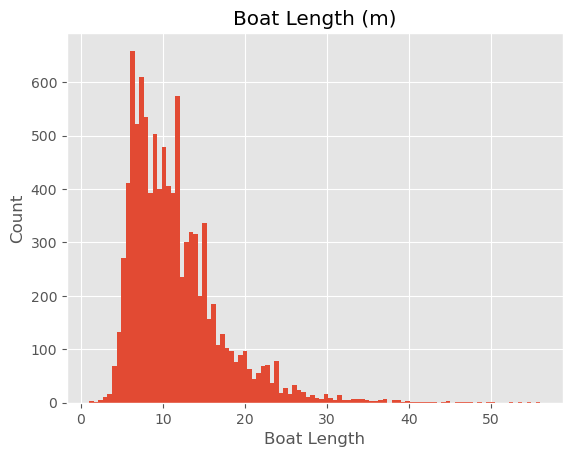

In [52]:
# Histogram of the distribution of boat lengths
ax = cleaned_df['Length'].plot(kind='hist',
                          bins=100,
                          title='Boat Length (m)')
ax.set_xlabel('Boat Length')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

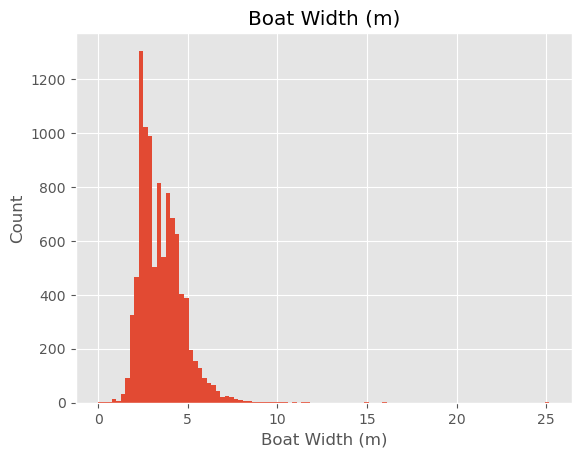

In [53]:
# Histogram of the distribution of boat widths
ax = cleaned_df['Width'].plot(kind='hist',
                          bins=100,
                          title='Boat Width (m)')
ax.set_xlabel('Boat Width (m)')
ax.set_ylabel('Count')

In [54]:
# Lst all column names in the DataFrame
cleaned_df.columns

Index(['Boat_Type', 'Manufacturer', 'Type', 'Year_Built', 'Length', 'Width',
       'Material', 'Views_last_7_days', 'Currency', 'Amount', 'Price_in_EUR',
       'Country', 'Place_1', 'Place_2'],
      dtype='object')

Text(0, 0.5, 'Count')

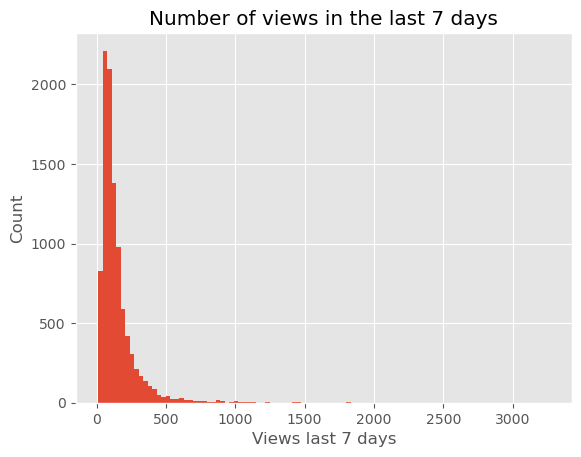

In [55]:
# Histogram of the distribution of Views in the last 7 days
ax = cleaned_df['Views_last_7_days'].plot(kind='hist',
                          bins=100,
                          title='Number of views in the last 7 days')
ax.set_xlabel('Views last 7 days')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

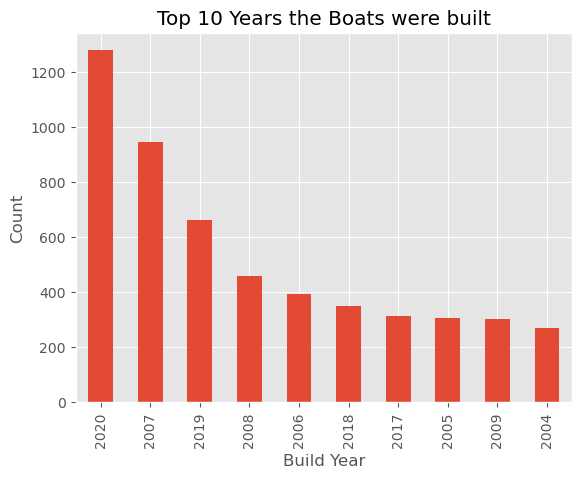

In [56]:
# Bar plot to visualize the top 10 years in which boats were built
ax = cleaned_df['Year_Built'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years the Boats were built')
ax.set_xlabel('Build Year')
ax.set_ylabel('Count')

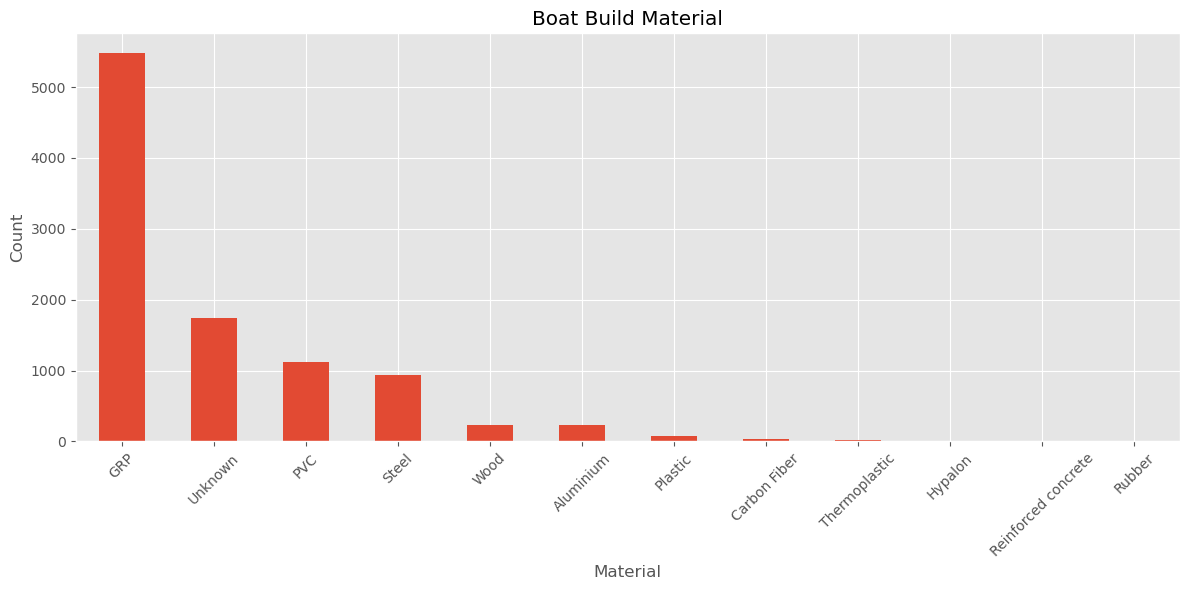

In [57]:
# Bar plot to visualize the count of different boat build materials
cleaned_df['Material'].value_counts().plot(
    kind='bar', 
    title='Boat Build Material', 
    figsize=(12, 6), 
    rot=45
)
plt.xlabel('Material')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Categorical Plot (catplot)

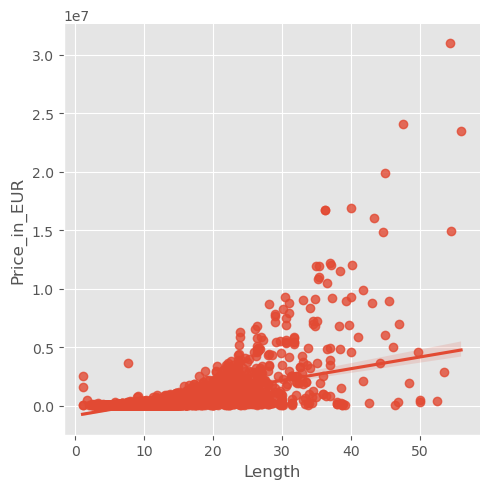

In [59]:
# Boat Length (m) vs. Price in €
sns.lmplot(x = 'Length', y = 'Price_in_EUR', data = cleaned_df)

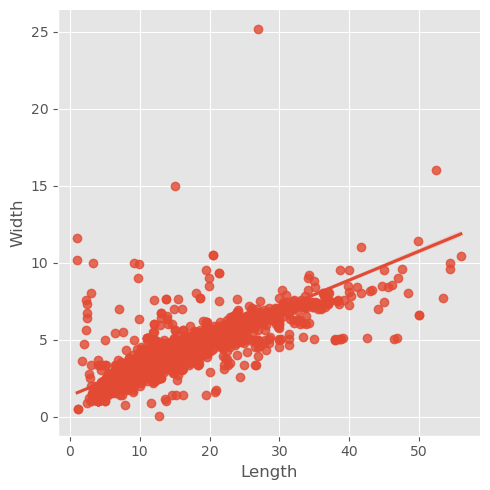

In [60]:
# Boat Length (m) vs. Width  (m)
sns.lmplot(x = 'Length', y = 'Width', data = cleaned_df)

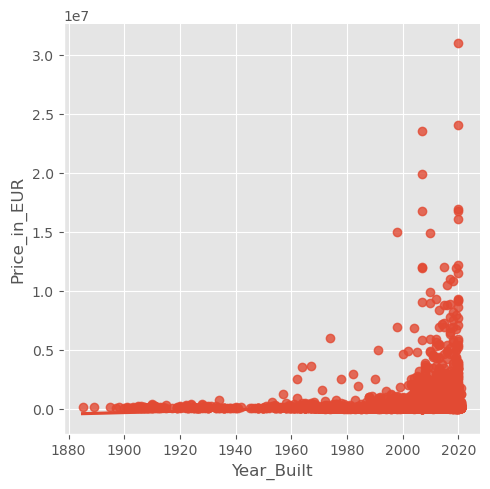

In [61]:
# Build Year vs. Price in €
sns.lmplot(x = 'Year_Built', y = 'Price_in_EUR', data = cleaned_df)

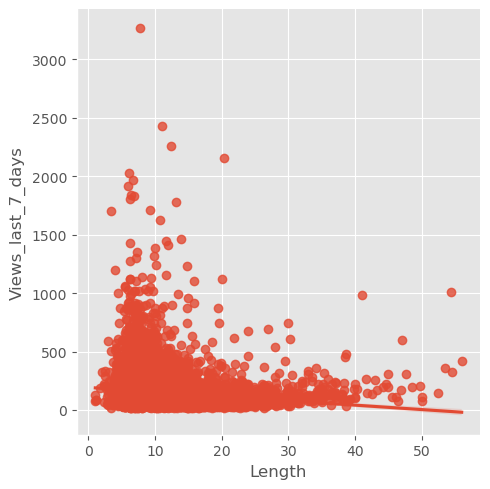

In [62]:
# Boat Length (m) vs. Views on last 7 days
sns.lmplot(x = 'Length', y = 'Views_last_7_days', data = cleaned_df)

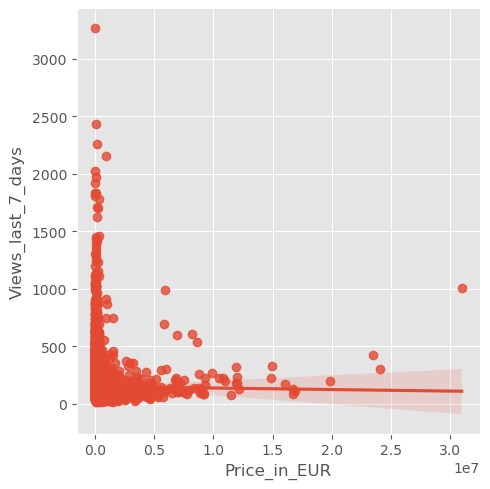

In [63]:
# Price (€) vs. Views on last 7 days
sns.lmplot(x = 'Price_in_EUR', y = 'Views_last_7_days', data = cleaned_df)

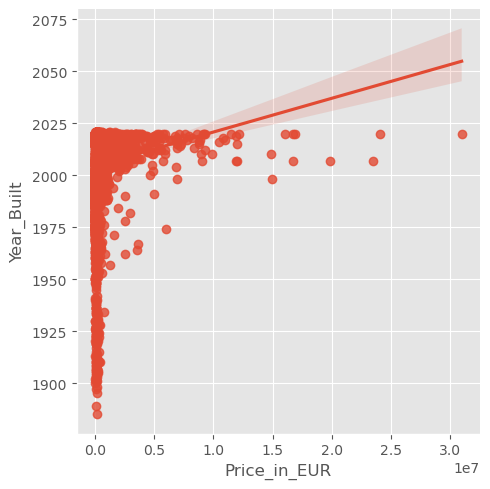

In [64]:
# Price (€) vs. Build Year
sns.lmplot(x = 'Price_in_EUR', y = 'Year_Built', data = cleaned_df)

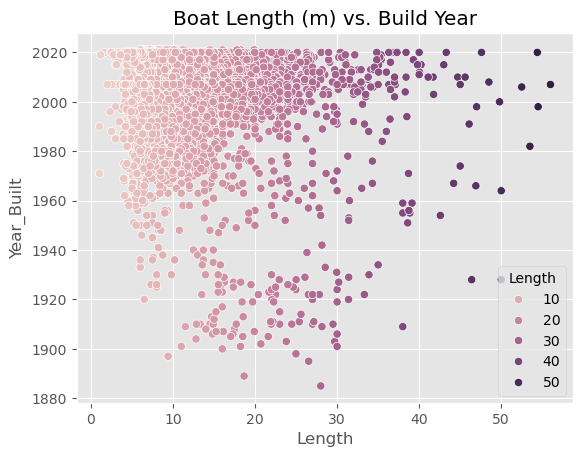

In [65]:
# Create a scatterplot for the "Boat Length" vs. "Year Built" columns
ax = sns.scatterplot(x='Length',
                y='Year_Built',
                hue='Length',
                data=cleaned_df)
ax.set_title('Boat Length (m) vs. Build Year')
plt.show()

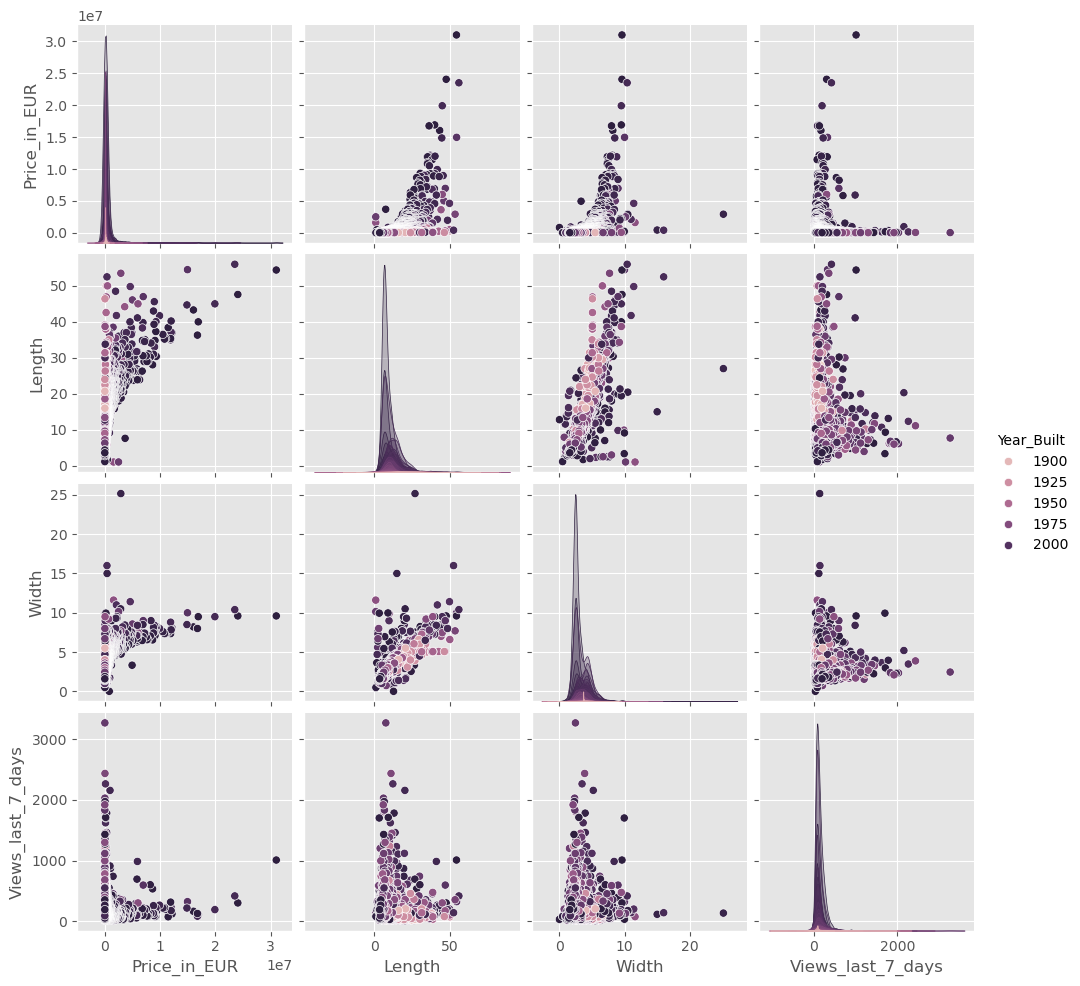

In [66]:
# Pair Plot to creates a grid of scatterplots to show pairwise relationships between numerical variables in a dataset
sns.pairplot(cleaned_df,
             vars = ['Price_in_EUR', 'Length',
                   'Width','Views_last_7_days'],
             hue = 'Year_Built')
plt.show()

In [67]:
# Correlation matrix for a subset of columns in the DataFrame 
df_corr = cleaned_df[['Price_in_EUR','Year_Built','Length',
    'Width','Views_last_7_days']].dropna().corr()
df_corr

,Price_in_EUR,Year_Built,Length,Width,Views_last_7_days
Price_in_EUR,1.000000,0.099762,0.588260,0.519861,-0.008560
Year_Built,0.099762,1.000000,-0.185933,-0.097436,-0.113606
Length,0.588260,-0.185933,1.000000,0.889265,-0.142896
Width,0.519861,-0.097436,0.889265,1.000000,-0.158341
Views_last_7_days,-0.008560,-0.113606,-0.142896,-0.158341,1.000000


In [68]:
# Print out the column names
print(cleaned_df.columns.tolist())

['Boat_Type', 'Manufacturer', 'Type', 'Year_Built', 'Length', 'Width', 'Material', 'Views_last_7_days', 'Currency', 'Amount', 'Price_in_EUR', 'Country', 'Place_1', 'Place_2']


<Axes: >

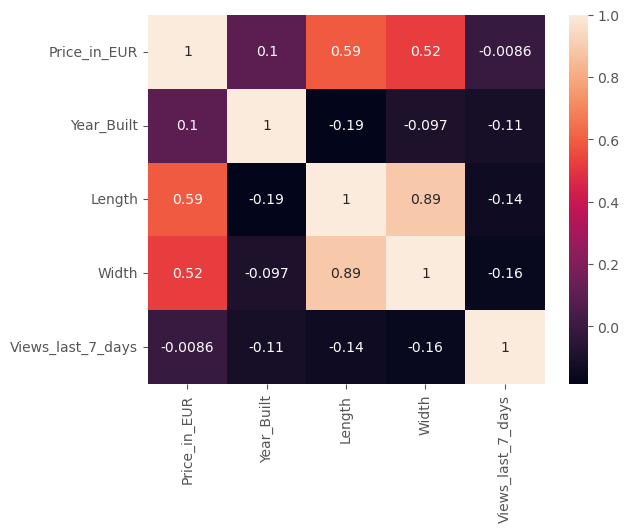

In [69]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the 
# subplots defined above. The `annot` argument allows the plot to place the correlation coefficients onto 
# the heatmap.
sns.heatmap(df_corr, annot=True)

# Step 5: Ask Questions about the data
- Does the length of the boat influence its price?
- Does the price categories influence the number of views an advert gets?
- Does the age of the boat influence the number of views an advert gets?

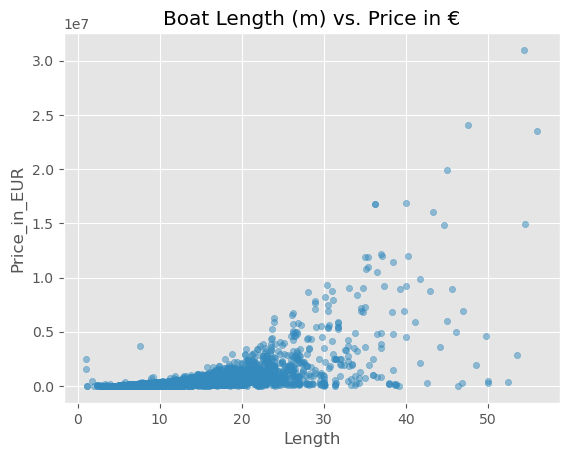

In [71]:
# Boat Length (m) vs. Price in €
cleaned_df.plot(kind='scatter',
        x='Length',
        y='Price_in_EUR',
        title='Boat Length (m) vs. Price in €',
        alpha=0.5)  # Set transparency)
plt.show()

### Observations on the Length of the Boat and its Price
There is a clear positive correlation between boat length and price. As the length of the boat increases, the price tends to increase as well. This makes intuitive sense, as larger boats would generally be more expensive. The plot emphasizes that boat length is a significant factor determining price, as expected. However, the scatter in the data suggests that other factors beyond length also influence the price, like manufacturer, age, engine, fuel type and more. 

The outliers point out that in some cases these secondary factors can have a big impact on the price.

In [73]:
cleaned_df.loc[cleaned_df['Price_in_EUR'] < 1000000, 'Price_Category'] = 'Very low'

In [74]:
cleaned_df.loc[cleaned_df['Price_in_EUR'] >= 5000000, 'Price_Category'] = 'Low'

In [75]:
cleaned_df.loc[cleaned_df['Price_in_EUR'] >= 15000000, 'Price_Category'] = 'Medium'

In [76]:
cleaned_df.loc[cleaned_df['Price_in_EUR'] >= 25000000, 'Price_Category'] = 'High'

In [77]:
cleaned_df.loc[cleaned_df['Price_in_EUR'] >= 29000000, 'Price_Category'] = 'Very high'

In [78]:
cleaned_df['Price_Category'].value_counts(dropna = False)

Price_Category
Very low     9387
NaN           429
Low            58
Medium          7
Very high       1
Name: count, dtype: int64

In [79]:
cleaned_df.columns

Index(['Boat_Type', 'Manufacturer', 'Type', 'Year_Built', 'Length', 'Width',
       'Material', 'Views_last_7_days', 'Currency', 'Amount', 'Price_in_EUR',
       'Country', 'Place_1', 'Place_2', 'Price_Category'],
      dtype='object')

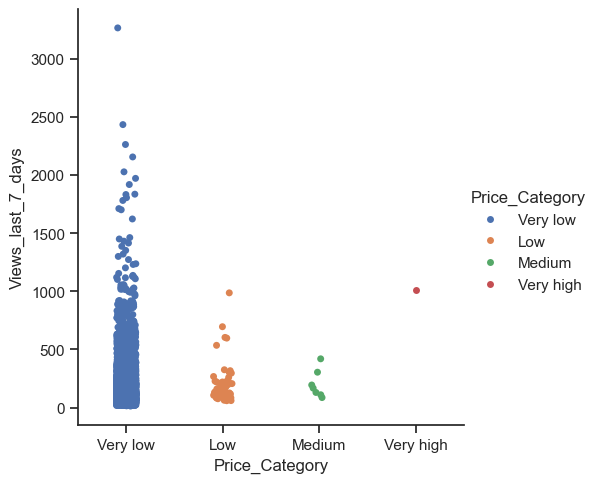

In [80]:
# Create a categorical plot of the price categories vs the number of views in the last 7 days
sns.set(style="ticks")
g = sns.catplot(x="Price_Category", y="Views_last_7_days", hue="Price_Category", data=cleaned_df)

###  Observations on the Price Categories vs the Number of Views
Very low-priced boats are the most popular and most numerous. The number of views decreases as the price of the boat increases.
There is only one very high-priced boat, so it's hard to generalise about this category. Limited view counts for high price categories 

The range of view counts decreases as the price category moves from low to high. This suggests that higher-priced boats are viewed less frequently.

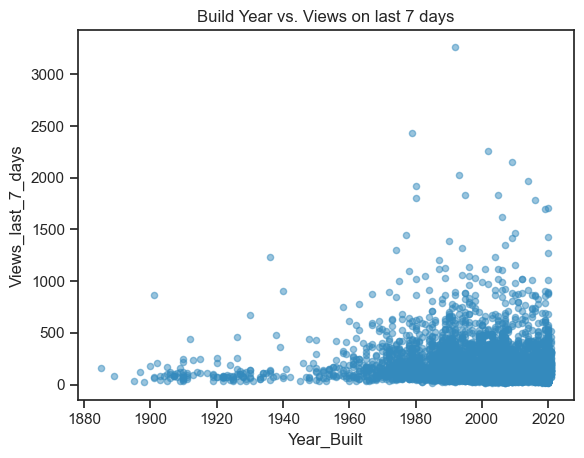

In [82]:
# Build Year vs. Views on last 7 days
cleaned_df.plot(kind='scatter',
        x='Year_Built',
        y='Views_last_7_days',
        title='Build Year vs. Views on last 7 days',
        alpha=0.5)  # Set transparency)
plt.show()

### Observations on the Number of Views vs the Age of the Boats

The scatter plot shows that the newer boats tend to attract more views. The variation in views increases with newer boats, with many data points in the 1000-2000 view range, and even above 3000 for the very new boats. Older boats are almost always clustered close to 0 views. 

There are a number of outliers, particularly for very recent boats. This shows that although there is a general trend for views to increase, there are boats with much higher view counts. 

In [165]:
# Define the file path where the pickle file will be saved
file_path = '/Users/omkargopalakrishnan/Downloads/DA-Course/Data Immersion/Exercises-OG/6/6.2/02 Data/Prepared Data/cleaned_df.pkl'

# Save the DataFrame as a pickle file
cleaned_df.to_pickle(file_path)

print(f"DataFrame has been pickled and saved to: {file_path}")

DataFrame has been pickled and saved to: /Users/omkargopalakrishnan/Downloads/DA-Course/Data Immersion/Exercises-OG/6/6.2/02 Data/Prepared Data/cleaned_df.pkl


In [169]:
import pandas as pd

# Define the file path where the CSV will be saved
file_path = '/Users/omkargopalakrishnan/Downloads/DA-Course/Data Immersion/Exercises-OG/6/6.2/02 Data/Prepared Data/cleaned_df.csv'

# Export the DataFrame to a CSV file
cleaned_df.to_csv(file_path, index=False)

print(f"DataFrame has been exported to: {file_path}")

DataFrame has been exported to: /Users/omkargopalakrishnan/Downloads/DA-Course/Data Immersion/Exercises-OG/6/6.3/02 Data/Prepared Data/cleaned_df.csv
